<a href="https://colab.research.google.com/github/Dev147605/25COA122-Semester-1-Coursework/blob/main/25coa122_semester_1_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#25COA122 Semester 1 Coursework - Games management software for a Games store


#Checking to see if the PYC files are working


In [173]:
#from google.colab import files
#uploaded = files.upload()



In [174]:
#import subscriptionManager as smDP
#import feedbackManager as fmDP

#check feedback manager works
#feedback_list = fmDP.load_feedback()
#print(feedback_list)
#fmDP.add_feedback("dtf01", 4, "Not Bad", "Game_Feedback.txt")

#check subscription manager works
#subscriptions = smDP.load_subscriptions()
#print(smDP.check_subscription("lbro", subscriptions))
#should return True or False based on current date
#print(smDP.get_rental_limit("Basic")) #should return 2

In [175]:
#the date in the video_game.txt is year-month-day

In [176]:
import ipywidgets as widgets
from IPython.display import display
from google.colab import runtime
import subscriptionManager as smDP
import feedbackManager as fmDP
import matplotlib.pyplot as plt
feedback = fmDP.load_feedback()
#print(feedback)

#menu
##This is the main cell provides the required menu options to the store manager, which will be based on the GUI

In [177]:
#-----------------------------------------------
#All of the functions that need to be created
#-----------------------------------------------

#This function acts as an intermediary where depending on what the user wants to do
#the user is directed to the correct screen
def action_option(value):
    if value == "Search for games":
      page_switcher(clicked_search)
    elif value == "Rent a game":
      page_switcher(clicked_rent)
    elif value == "Return a game":
      page_switcher(clicked_return)
    elif value == "Make a booking":
      clicked_booking()
    elif value == "Analytics":
      page_switcher(clicked_analytics)

#This piece of code is used in the function below to clear the screen before
#displaying the next screen
page_container = widgets.Output(
    layout = widgets.Layout(
        width = "100%",
        height = "100%",
        border = None,
        overflow = "auto"
    )
)

#This function clears the screen and displays the new screen depending on what
#the user wants to do. This is to make sure the GUI isn't on one continuous screen
#to increase the usability.
def page_switcher(page):
    with page_container:
      page_container.clear_output()
      page()

#-------------------------------------------
#Main Menu Page
#-------------------------------------------

#This function displays the first thing the user sees when the program is loaded
#which allows the user to see what they can do
def main_menu():
    dropdown_menu_select = widgets.Select(
        options=["Search for games", "Rent a game", "Return a game",
                "Make a booking", "Analytics"],
        value="Search for games",
        description="Select an action:",
        style ={"description_width": "auto"},
        disabled=False
    )

    confirm_button = widgets.Button(
        description = "Confirm choice"
    )

    confirm_button.on_click(lambda btn: action_option(dropdown_menu_select.value))

    screen = widgets.VBox([
            widgets.HTML(value = "<h2>Main Menu</h2>"),
            dropdown_menu_select,
            confirm_button
        ])
    display(screen)


#gameSearch
##This module contains all of the functions that allows the manager to input search terms as strings and return the output

In [178]:
#This function is the intermediary which directs the user to different screens
#if they want to search for videogames or boardgames.
def search_option(value):
    if value == "Videogames":
      page_switcher(videogame_button_clicked)
    elif value == "Boardgames":
      page_switcher(boardgame_button_clicked)

#This function displays a dropdown menu of videogames and boardgames which the
#user can interact with and confirm their choice.
def clicked_search():

    dropdown_select = widgets.Select(
        options = ["Videogames", "Boardgames"],
        value = "Videogames",
        description = "Search by:",
        rows = 2,
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm choice",
    )

    back = widgets.Button(
        description = "Back"
    )
    back.on_click(main_menu)

    confirm_button.on_click(lambda btn: search_option(dropdown_select.value))

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>What do you want to search for</h2>"),
        dropdown_select,
        confirm_button,
        back
    ])

    display(screen)

#--------------------------------
# All of the functions related for searching for videogames
#--------------------------------

#This function has a menu which has all of the ways the user can search
#for videogames and they can confirm their choice.
def videogame_button_clicked():

    dropdown_select = widgets.Select(
        options=["Name", "Genre", "Platform"],
        rows = 3,
        value="Name",
        description="Search by:",
        disabled=False
    )

    confirm_button = widgets.Button(
        description = "Confirm choice"
    )
    back = widgets.Button(
        description = "Back"
    )
    back.on_click(clicked_search)

    confirm_button.on_click(lambda btn: videogame_option(dropdown_select.value))

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>How do you want to search for the game</h2>"),
        dropdown_select,
        confirm_button,
        back
    ])
    display(screen)

#This function is an intermediary function which links all of the different ways
#the user can search for videogames.
def videogame_option(value):
    if value == "Name":
      page_switcher(search_video_Name)
    elif value == "Genre":
      page_switcher(search_video_Genre)
    elif value == "Platform":
      page_switcher(search_video_Platform)

#This function is used when the user wants to enter the name of the game manually
def search_video_Name():
    textBox = widgets.Text(
        value = "",
        placeholder = "Enter Name",
        description = "Name:",
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm choice"
    )
    back = widgets.Button(
        description = "Back"
    )
    back.on_click(videogame_button_clicked)

    confirm_button.on_click(lambda btn: search_video_game_Name_db(textBox.value))
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Enter the name of the videogame<h2>"),
        textBox,
        confirm_button,
        back
    ])
    display(screen)

#This function is used to search for videogames by genre
def search_video_Genre():
    #I have an idea to read the file first in the Genre column and add them to an array
    #if it isnt already in the array to ensure this program can work with any similar database
    dropdown_select = widgets.Select(
        options = ["Action","RPG","Adventure","Shooter","Sports","Racing","Strategy","Puzzle",
                  "Simulation","Platformer","Fighting","Sandbox","JRPG"],
        rows = 13,
        value = "Action",
        description = "Genre:",
        disabled = False

    )

    confirm_button = widgets.Button(
        description = "Confirm choice"
        )
    confirm_button.on_click(lambda btn: search_video_Genre_Platform_db("Genre",dropdown_select.value))
    back = widgets.Button(
        description = "Back"
    )
    back.on_click(videogame_button_clicked)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Click which genre you want<h2>"),
        dropdown_select,
        confirm_button,
        back
    ])
    display(screen)


#This function is used to search for videogames by platform
def search_video_Platform():
    dropdown_select = widgets.Select(
        options = ["PlayStation 4", "PlayStation 5", "Nintendo Switch", "Nintendo Switch 2",
                  "Xbox Series S/X", "PC"],
        rows = 6,
        value = "PlayStation 4",
        description = "Platform:",
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn: search_video_Genre_Platform_db("Platform",dropdown_select.value))
    back = widgets.Button(
        description = "BacK"
    )
    back.on_click(videogame_button_clicked)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Click which platform you want<h2>"),
        dropdown_select,
        confirm_button,
        back
    ])
    display(screen)


#------------------------------------------------------
#All of the functions required to search for boardgames
#------------------------------------------------------

#This function displays the dropdown menu to display all the different ways the
#use can search for a boardgame
def boardgame_button_clicked():
    dropdown_select = widgets.Select(
        options = ["Name","Number of players","Genre"],
        value = "Name",
        description = "Search by:",
        style = {"description_width" : "auto"},
        disabled = False,
        rows = 3
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:boardgame_option(dropdown_select.value))
    back = widgets.Button(
        description = "Back"
    )
    back.on_click(clicked_search)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>How do you want to search for a game<h2>"),
        dropdown_select,
        confirm_button,
        back
    ])

    display(screen)

#This function is an intermediary depending on how to the user wants to search
#for a boardgame and leads them to the appropriate screen
def boardgame_option(value):
    if value == "Name":
      page_switcher(search_board_name)
    elif value == "Number of players":
      page_switcher(search_board_NoPlayers)
    else:
      page_switcher(search_board_Genre)

#This function displays a text box where the user can enter the name of the game
#manually
def search_board_name():
    textBox = widgets.Text(
        value = "",
        placeholder = "Enter name",
        description = "Enter name:",
        style = {"description_width":"auto"},
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn: search_board_game_Name_db(textBox.value))
    back = widgets.Button(
        description = "Back"
    )
    back.on_click(boardgame_button_clicked)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Enter the name of the game<h2>"),
        textBox,
        confirm_button,
        back
    ])
    display(screen)

def search_board_NoPlayers():
    dropdown_select = widgets.Select(
        options = ["2","3","4","5","6","7","8","9","10"],
        value = "2",
        description = "Choose number of players",
        style = {"description_width":"auto"},
        disabled = False,
        rows = 9
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:search_board_game_noPlayers_db(dropdown_select.value))
    back = widgets.Button(
        description = "Back"
    )
    back.on_click(boardgame_button_clicked)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Choose the number of players you want the game to be<h2>"),
        dropdown_select,
        confirm_button,
        back
    ])

    display(screen)

#This function displays a dropdown table to the user of all the genres of boardgames.
#The player can select one of the genres and will be displayed all of the games that fall
#under that genre
def search_board_Genre():
    dropdown_select = widgets.Select(
        options = ["Strategy","Thematic","Resource Management","Mystery","War",
                  "Party","Card","Casual","Chance","Trivia","Abstract Strategy",
                  "Word"],
        value = "Strategy",
        description = "Choose a genre",
        style = {"description_width":"auto"},
        disabled = False,
        rows = 12
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:search_board_game_Genre_db(dropdown_select.value))
    back = widgets.Button(
        description = "BacK"
    )
    back.on_click(boardgame_button_clicked)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Choose a genre<h2>"),
        dropdown_select,
        confirm_button,
        back
    ])
    display(screen)

    #when the button is clicked the user needs to be taken to the db functions


#gameRent
##This module contains the functions that prompt the manager to input the customer's ID and the ID of the game they want to rent. After checking that both of the inputs are valid, a message is displayed which says if the game's been rented out successfully.

In [179]:
def clicked_rent():
    CustID = widgets.Text(
        value = "",
        placeholder = "Enter customer ID",
        description = "Enter ID:",
        disabled = False
    )
    gameID = widgets.Text(
        value = "",
        placeholder = "Enter game ID",
        description = "Enter ID",
        disabled = False
    )
    confirm_button = widgets.Button(
        value = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:confirm_custID_gameID(CustID.value,gameID.value))
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Enter the id of the game and the customer<h2>"),
        CustID,
        gameID,
        confirm_button
    ])
    display(screen)

def confirm_custID_gameID(customer,game):
    subscriptions = smDP.load_subscriptions()
    valid = smDP.check_subscription(customer,subscriptions)
    #we need to check if the game entered exists
    found = False
    with open ("Rental.txt","r") as file:
        header = file.readline().strip().split(",")
        column = header.index("GameID")
        for line in file:
            data = line.strip().split(",")
            if data[column] == game:
                found = True
                print("correct details")
                #link to db function

    re_enter = widgets.Button(
        description = "Re-enter details"
    )

    back = widgets.Button(
        description = "Back"
    )
    re_enter.on_click(clicked_rent)
    back.on_click(main_menu)

    if (found == False) or (valid == False):
        screen = widgets.VBox([
            widgets.HTML(value = "<h2>There's an error which means the <h2>"),
            widgets.HTML(value = "<h2>customer ID entered is incorrect<h2>"),
            re_enter,
            back
        ])
        display(screen)





#gameReturn
##This module contains the functions that prompt the manager for the ID of the game that needs to be returned and collect any feedback from the customer.


In [180]:
def clicked_return():
    custID = widgets.Text(
        value = "",
        placeholder = "Enter customer ID:",
        description = "CustID",
        disabled = False
    )
    rating = widgets.Dropdown(
        options = [("⭐",1),("⭐⭐",2),("⭐⭐⭐",3),("⭐⭐⭐⭐",4),("⭐⭐⭐⭐⭐",5)],
        value = 1,
        description = "Rating:",
        #layout = widgets.Layout(width = "auto")
    )
    comments = widgets.Textarea(
        value = "",
        placeholder = "Enter a comment",
        description = "Comment:",
        disabled = False
    )
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>This is where you can return games<h2>"),
        widgets.HTML(value = "<h2>Enter the Game ID and the Customer ID and an optional comment<h2>"),
        custID,
        rating,
        comments
    ])
    display(screen)

#inventoryPruning
#This module cotains all of the functions that are necessary to display the analytics for the videogames and boardgames to indicate which vidoegames and boardgames are the most and least rented.


In [181]:
def analytics_option(value):
    if value == "Videogame Analytics":
        page_switcher(video_game_analytics)
    else:
        page_switcher(board_game_analytics)
def clicked_analytics():
    dropdown = widgets.Select(
        options = ["Videogame Analytics","Boardgame Analytics"],
        value = "Videogame Analytics",
        rows = 2,
        description = "Search:",
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:analytics_option(dropdown.value))
    back_button = widgets.Button(
        description = "Back"
    )
    back_button.on_click(main_menu)

    screen = widgets.VBox([
        widgets.HTML(value = "<h2>Click to view boardgame or videogame anaylytics<h2>"),
        dropdown,
        confirm_button,
        back_button
    ])
    display(screen)

def video_game_analytics():
    names = []
    data = []
    totalVideo = 0
    with open("Amnt_rentals.txt","r") as file:
        for line in file:
            parts = line.strip().split(",")
            if len(parts)>1 and parts[3] == "Video":
                names.append(parts[1])
                data.append(parts[2])
    for i in range(len(data)):
        totalVideo += int(data[i])

    fig, ax = plt.subplots(figsize = (8,8))

    wedges,texts,autotexts = ax.pie(
        data,
        autopct = lambda pct:percentage(pct,data,totalVideo)
    )

    legend_labels = [
        f"{name}: Rented {(data[int(value)])} times ({int(value):.1f}%) "
        for name,value in zip(names,data)
    ]

    ax.legend(
        wedges,
        legend_labels,
        loc = "center left",
        bbox_to_anchor=(1, 0.5)
    )

    plt.show()

def percentage(pct,data,total):
    value = pct * total / 100
    return f"{int(value)}"



def board_game_analytics():
    names = []
    data = []
    totalBoard = 0
    with open("Amnt_rentals.txt","r") as file:
        for line in file:
            parts = line.strip().split(",")
            if len(parts)>1 and parts[3] == "Board":
                names.append(parts[1])
                data.append(parts[2])

    for j in range(len(data)):
        totalBoard += int(data[j])

    fig, ax = plt.subplots(figsize = (8,8))

    wedges, texts, autotexts = ax.pie(
        data,
        autopct = lambda pct:percentage(pct,data,totalBoard)
    )

    legend_labels = [
        f"{name}: Rented {(data[int(value)])} times ({int(value):.1f}%)"
        for name,value in zip(names,data)
    ]

    ax.legend(
        wedges,
        legend_labels,
        loc = "center left",
        bbox_to_anchor = (1,0.5)
    )

    plt.show()

#booking
##This module contains all of the functions the manager needs to make bookings for the customers when they want to play games face to face with others.

In [182]:
def clicked_booking(button):
    print("make bookings")

#database
##This module contains all of the functions that the games-record, search, rent, return, and inventory pruning used to interact with all of the data files.

In [183]:
#---------------------------------------------------
#All of the functions needed to search for videgames
#---------------------------------------------------

#This function searches for videogames by name entered by the user.
def search_video_game_Name_db(value):
    found = False
    with open("Video_Game_Info.txt","r") as file:
        header = file.readline().strip().split(",")
        column = header.index("Name")
        for line in file:
            data = line.strip().split(",")
            if data[column] == value:
                clicked_confirm_video_game(value)
                found = True
                break
            if not found:
                print()

#This function is used to ask the user if they want to rent out this game to a
#customer. This function can also be used when displaying the games based on genre
#and platform
def clicked_confirm_video_game(game_name):
    rent_button = widgets.Button(
        description = "Rent",
    )
    #rent_button.on_click(pre_searched(game_name))
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>We have that game<h2>"),
        widgets.HTML(value = "<h2>Would you like to rent it<h2>")
    ])
    display(screen)

#This function searches for videogames by genre or by platform
#depending on which the user selected.
def search_video_Genre_Platform_db(column,value):
    results = []
    if column == "Genre":
      column_index = 3
    else:
      column_index = 2
    with open("Video_Game_Info.txt","r") as file:
      for line in file:
        parts = line.strip().split(",")
        if len(parts) > column_index and parts[column_index] == value:
          results.append(parts[1])
    page_container.clear_output()
    dropdown_select = widgets.Select(
        options = results,
        value = results[0],
        rows = len(results),
        description = "Filtered games:",
        layout = {"width":"max-content"},
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:clicked_confirm_video_game(dropdown_select.value))
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>These are the games that meet your criteria<h2>"),
        dropdown_select,
        confirm_button
    ])

    display(screen)

#-------------------------------------------------------------
#These are all the functions required to search for boardgames
#-------------------------------------------------------------

#This function displays a button which allows the user to choose to rent the game
#if it's in the database
def clicked_confirm_board_game(button):
    rent_button = widgets.Button(
        description = "Rent"
    )
    rent_button.on_click()
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>We have the selected game<h2>"),
        widgets.HTML(calue = "<h2>Would you like to rent it?<h2>"),
        rent_button
    ])

    display(screen)

#This function displays text to the user if the game entered by name isn't
#in the database
def search_game_Name_not_found():
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>We don't have that game in stock<h2>"),
        widgets.HTML(value = "<h2>Sorry!<h2>")
    ])
    display(screen)

#This function is used to work out whether the name of a game entered by the user
#is in the databases
def search_board_game_Name_db(value):
    found = False
    with open("Board_Game_Info.txt","r") as file:
        header = file.readline().strip().split(",")
        column = header.index("Name")
        for line in file:
            data = line.strip().split(",")
            if data[column] == value:
                found = True
                clicked_confirm_board_game(value)
            if not found:
                search_game_Name_not_found()
                break


#This function is used to display the games that have the same genre
#as the one selected by the user
def search_board_game_Genre_db(value):
    results = []
    column_index = 3
    with open("Board_Game_Info.txt","r") as file:
        for line in file:
            parts = line.strip().split(",")
            if len(parts) > column_index and parts[column_index] == value:
                results.append(parts[1])
    page_container.clear_output()
    dropdown_select = widgets.Select(
        options = results,
        value = results[0],
        rows = len(results),
        description = "Filtered Games:",
        layout = {"width":"max-content"},
        disabled = False
    )

    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:clicked_confirm_board_game(dropdown_select.value))
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>These are the games that meet your criteria<h2>"),
        dropdown_select,
        confirm_button
    ])
    display(screen)

#This function is used to display all of the games that meet the number of players
#requirements
def search_board_game_noPlayers_db(value):
    results =[]
    with open("Board_Game_Info.txt","r") as file:
        header = file.readline().strip().split(",")
        column_index = header.index("NoPlayers")
        for line in file:
            parts = line.strip().split(",")
            number_players = parts[column_index]
            players = number_players.replace("-",",")
            if len(parts) > column_index and (int(value) >= int(players[0]) and int(value) <= int(players[2:])):
                results.append(parts[1])
    page_container.clear_output()
    dropdown_select = widgets.Select(
        options = results,
        value = results[0],
        description = "Filtered Games:",
        layout = {"width":"max-content"},
        disabled = False,
        rows = len(results)
    )
    confirm_button = widgets.Button(
        description = "Confirm Choice"
    )
    confirm_button.on_click(lambda btn:clicked_confirm_board_game(dropdown_select.value))
    screen = widgets.VBox([
        widgets.HTML(value = "<h2>These are the games that meet your criteria<h2>"),
        dropdown_select,
        confirm_button
    ])
    display(screen)

#-----------------------------------------------------
#All of the functions required to rent out a boardgame
#-----------------------------------------------------




#This piece of code that calls the function containing the main menu so the game can be launched and played.

Output(layout=Layout(height='100%', overflow='auto', width='100%'))

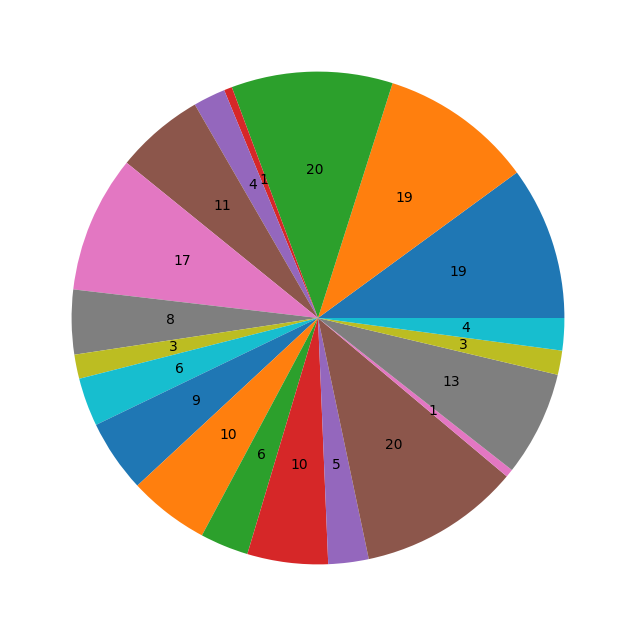

In [184]:
#This piece of code calls the function which stores the main menu
#so the user can interact with the system
page_switcher(main_menu)
display(page_container)